In [18]:
import sys
sys.path.append('../../../Scripts/')

In [19]:
import text_preprocessing as tp
import baseline_model as base
import plots as pl
import pandas as pd, numpy as np

In [20]:
path = '../Data/'

## Data

In [21]:
train = pd.read_csv(f'{path}train.csv')
test = pd.read_csv(f'{path}test.csv')

## Preprocessing

In [22]:
prep = tp.Preprocessing('english')

In [23]:
train_prep = prep.main_preprocess(train, 
                                column= 'sentence',
                                tweet = False,
                                tweet_tags = False,
                                remove_stop_words = False,
                                lemmatize = False,
                                translate_emojis = False,
                                whitelist = "")

In [24]:
test_prep = prep.main_preprocess(test, 
                                column= 'sentence',
                                tweet = False,
                                tweet_tags = False,
                                remove_stop_words = False,
                                lemmatize = False,
                                translate_emojis = False,
                                whitelist = "")

## Baseline

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [26]:
target_names = ['self-negative', 'self-positive', 'future-negative', 
                'future-positive', 'world-negative', 'world-positive']

seed = 42

### Logistic Regression

Model: Logistic Regression(Ngram: (1, 3), Min_df:3) --> Accuracy: 0.79


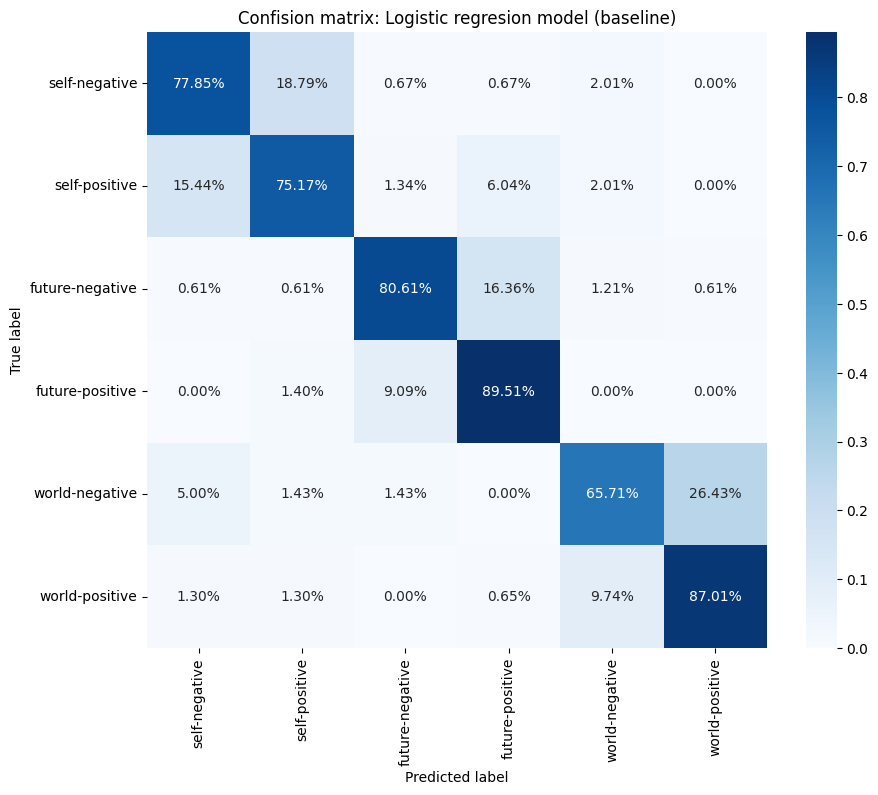

In [27]:
lr = LogisticRegression(random_state=seed)
b = base.Baseline(model=lr, 
                train_data=train_prep, 
                test_data=test_prep, 
                x_label_column='sentence', 
                y_label_column='label', 
                ngram_range=(1,3),
                min_df=3, 
                model_name='Logistic Regression', 
                target_names=target_names)

model_lr, vectorizer_lr, metrics_lr = b.baseline()

plot_lr = pl.Plots(metrics_lr)
plot_lr.plot_confusion_matrix(title='Confision matrix: Logistic regresion model (baseline)', 
                            x_label='Predicted label', 
                            y_label='True label', 
                            labels=target_names)


In [28]:
print(metrics_lr[0])

                 precision    recall  f1-score   support

  self-negative       0.78      0.78      0.78       149
  self-positive       0.76      0.75      0.76       149
future-negative       0.88      0.81      0.84       165
future-positive       0.77      0.90      0.83       143
 world-negative       0.80      0.66      0.72       140
 world-positive       0.78      0.87      0.82       154

       accuracy                           0.79       900
      macro avg       0.80      0.79      0.79       900
   weighted avg       0.80      0.79      0.79       900



### Random forest

Model: Random forest(Ngram: (1, 3), Min_df:3) --> Accuracy: 0.76


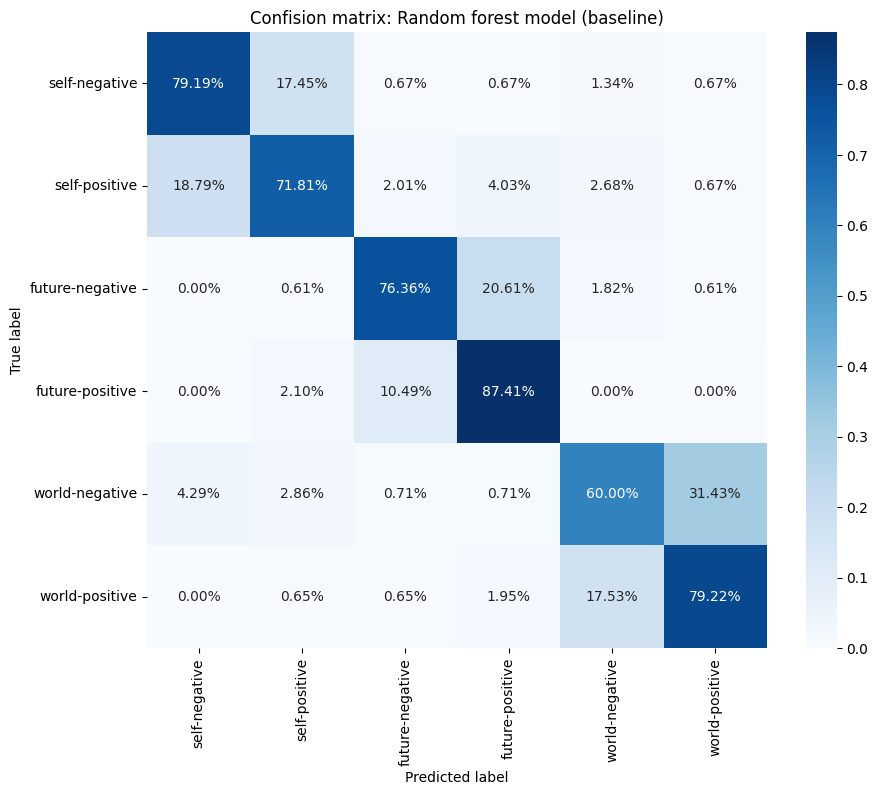

In [29]:
rf = RandomForestClassifier(random_state=seed)
b = base.Baseline(model=rf, 
                train_data=train_prep, 
                test_data=test_prep, 
                x_label_column='sentence', 
                y_label_column='label', 
                ngram_range=(1,3),
                min_df=3, 
                model_name='Random forest', 
                target_names=target_names)

model_rf, vectorizer_rf, metrics_rf = b.baseline()

plot_rf = pl.Plots(metrics_rf)
plot_rf.plot_confusion_matrix(title='Confision matrix: Random forest model (baseline)', 
                            x_label='Predicted label', 
                            y_label='True label', 
                            labels=target_names)


In [30]:
print(metrics_rf[0])

                 precision    recall  f1-score   support

  self-negative       0.78      0.79      0.78       149
  self-positive       0.75      0.72      0.74       149
future-negative       0.86      0.76      0.81       165
future-positive       0.74      0.87      0.80       143
 world-negative       0.70      0.60      0.65       140
 world-positive       0.72      0.79      0.76       154

       accuracy                           0.76       900
      macro avg       0.76      0.76      0.75       900
   weighted avg       0.76      0.76      0.76       900



### Decision tree

Model: Decision tree(Ngram: (1, 3), Min_df:3) --> Accuracy: 0.69


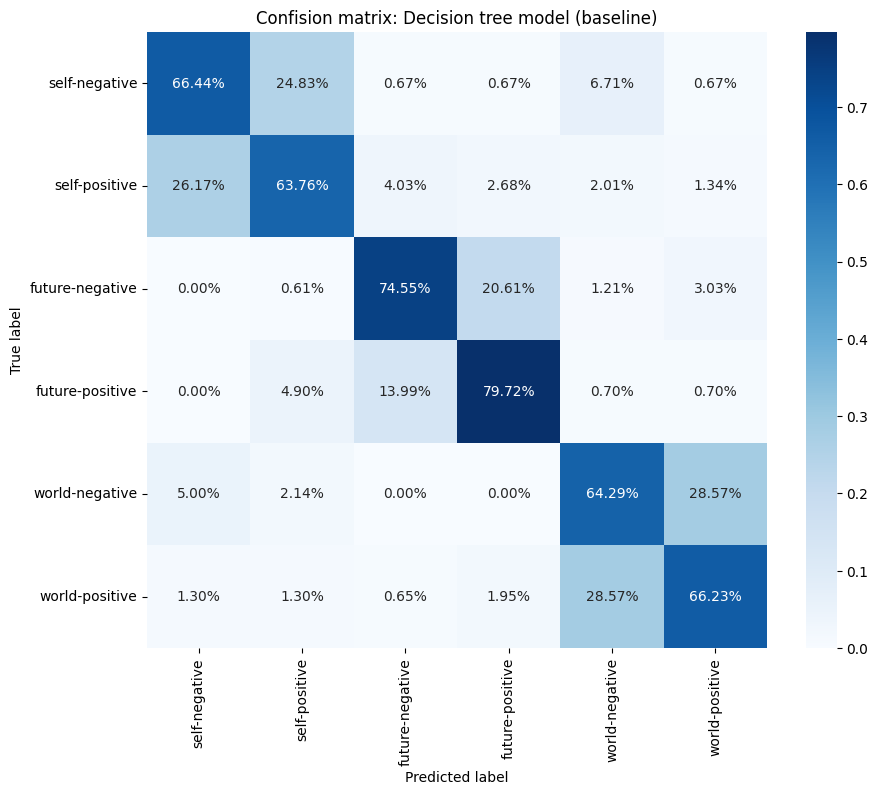

In [31]:
dt = DecisionTreeClassifier(random_state=seed)
b = base.Baseline(model=dt, 
                train_data=train_prep, 
                test_data=test_prep, 
                x_label_column='sentence', 
                y_label_column='label', 
                ngram_range=(1,3),
                min_df=3, 
                model_name='Decision tree', 
                target_names=target_names)

model_dt, vectorizer_dt, metrics_dt = b.baseline()

plot_dt = pl.Plots(metrics_dt)
plot_dt.plot_confusion_matrix(title='Confision matrix: Decision tree model (baseline)', 
                            x_label='Predicted label', 
                            y_label='True label', 
                            labels=target_names)


In [32]:
print(metrics_dt[0])

                 precision    recall  f1-score   support

  self-negative       0.67      0.66      0.67       149
  self-positive       0.66      0.64      0.65       149
future-negative       0.81      0.75      0.78       165
future-positive       0.73      0.80      0.76       143
 world-negative       0.60      0.64      0.62       140
 world-positive       0.68      0.66      0.67       154

       accuracy                           0.69       900
      macro avg       0.69      0.69      0.69       900
   weighted avg       0.69      0.69      0.69       900



### SVM

Model: SVM(Ngram: (1, 3), Min_df:3) --> Accuracy: 0.79


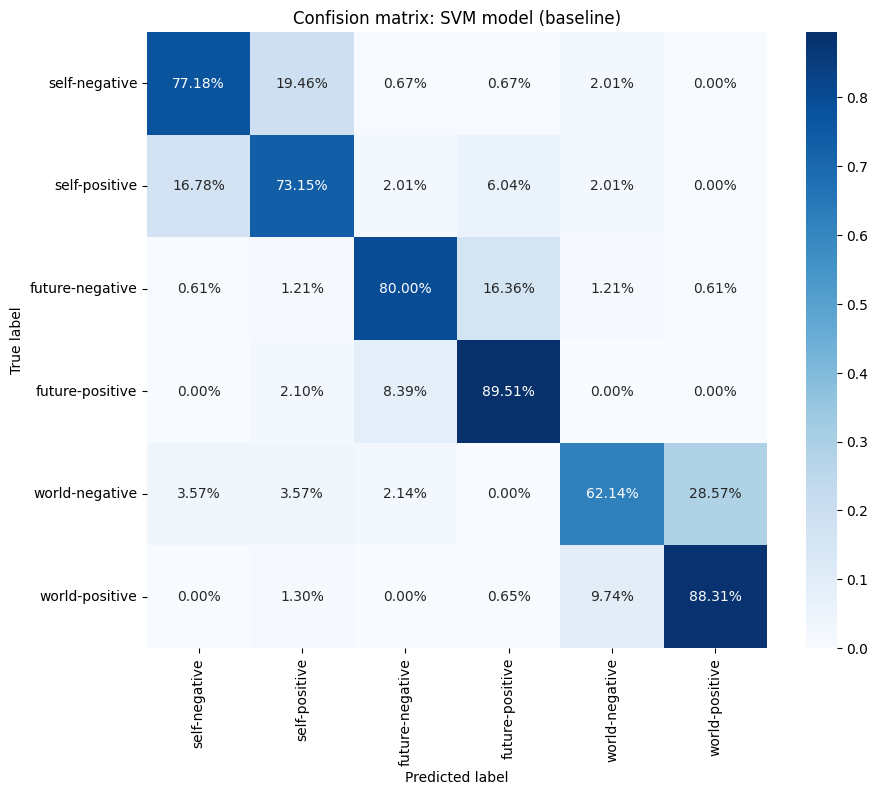

In [33]:
svm = SVC(random_state=seed)
b = base.Baseline(model=svm, 
                train_data=train_prep, 
                test_data=test_prep, 
                x_label_column='sentence', 
                y_label_column='label', 
                ngram_range=(1,3),
                min_df=3, 
                model_name='SVM', 
                target_names=target_names)

model_svm, vectorizer_svm, metrics_svm = b.baseline()

plot_svm = pl.Plots(metrics_svm)
plot_svm.plot_confusion_matrix(title='Confision matrix: SVM model (baseline)', 
                            x_label='Predicted label', 
                            y_label='True label', 
                            labels=target_names)

In [34]:
print(metrics_svm[0])

                 precision    recall  f1-score   support

  self-negative       0.79      0.77      0.78       149
  self-positive       0.73      0.73      0.73       149
future-negative       0.87      0.80      0.84       165
future-positive       0.77      0.90      0.83       143
 world-negative       0.79      0.62      0.70       140
 world-positive       0.77      0.88      0.82       154

       accuracy                           0.79       900
      macro avg       0.79      0.78      0.78       900
   weighted avg       0.79      0.79      0.78       900

